# MNIST Fashion recognition using Neural Network

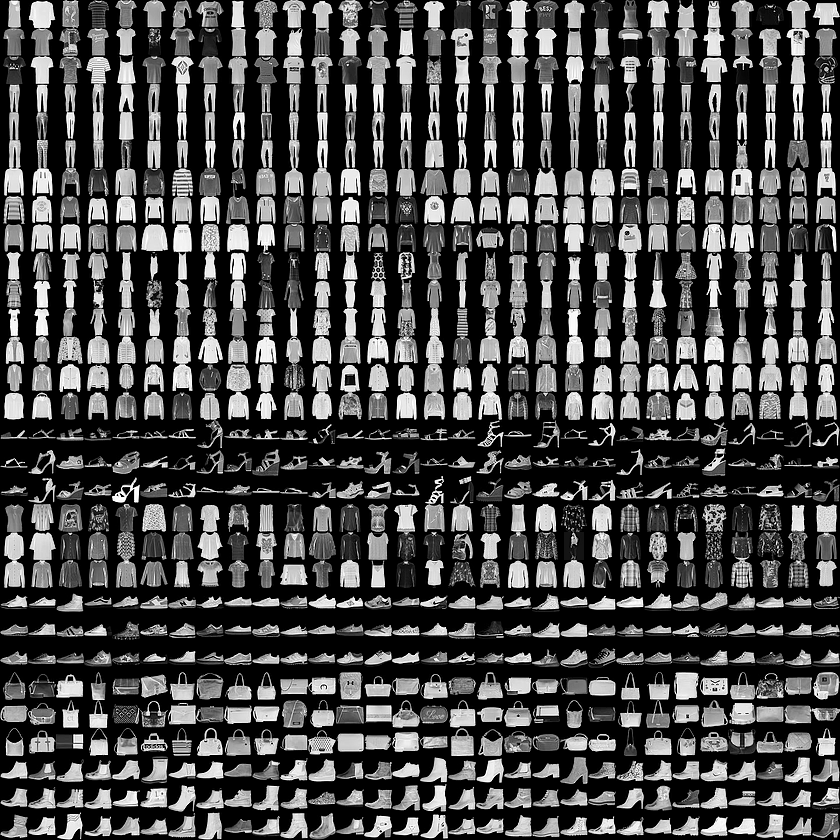

_Fashion-MNIST is a dataset of images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes which are:_

_0 - T-shirt/top_

_1 - Trouser_

_2 - Pullover_

_3 - Dress_

_4 - Coat_

_5 - Sandal_

_6 - Shirt_

_7 - Sneaker_

_8 - Bag_

_9 - Ankle boot_
***

## Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

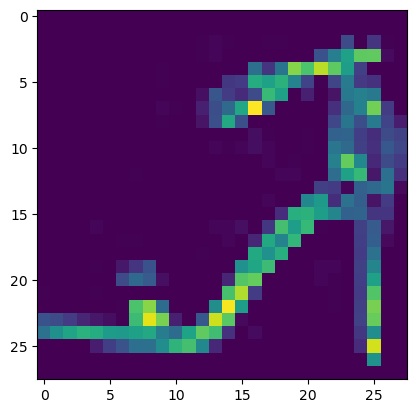

In [10]:
plt.imshow(X_train[8])

In [11]:
fashion = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 
          9:"Ankle boot"}

In [12]:
y_train[8]

5

In [13]:
fashion[y_train[8]]

'Sandal'

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04313725, 0.55686275, 0.78431373,
        0.41568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.7254902 ,
        0.43921569, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.59607843, 0.83921569, 0.85098039, 0.76078431,
        0.9254902 , 0.84705882, 0.73333333, 0.58431373, 0.52941176,
        0.6       , 0.82745098, 0.85098039, 0.90588235, 0.80392157,
        0.85098039, 0.7372549 , 0.13333333, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25882353, 0.7254902 , 0.65098039, 0.70588235, 0.70980392,
        0.74509804, 0.82745098, 0.86666667, 0.77254902, 0.57254902,
        0.77647059, 0.8078

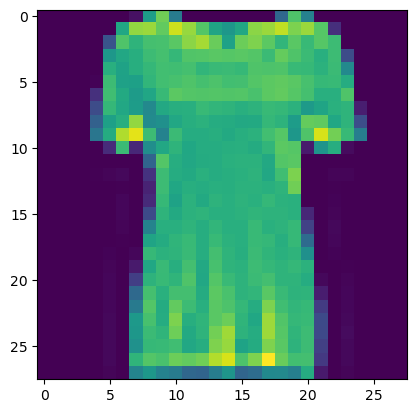

In [16]:
plt.imshow(X_train[10])

In [17]:
y_train[10]

0

In [18]:
fashion[y_train[10]]

'T-shirt/top'

## Model

* ### NN without any hidden layer

In [19]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5977 - accuracy: 0.7994
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4608 - accuracy: 0.8421
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4361 - accuracy: 0.8506
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4222 - accuracy: 0.8554
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4137 - accuracy: 0.8565
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4067 - accuracy: 0.8597
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4013 - accuracy: 0.8607
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3977 - accuracy: 0.8623
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3956 - accuracy: 0.8619
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.392

In [22]:
training_loss,training_acc=model.evaluate(X_train,y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3909 - accuracy: 0.8648


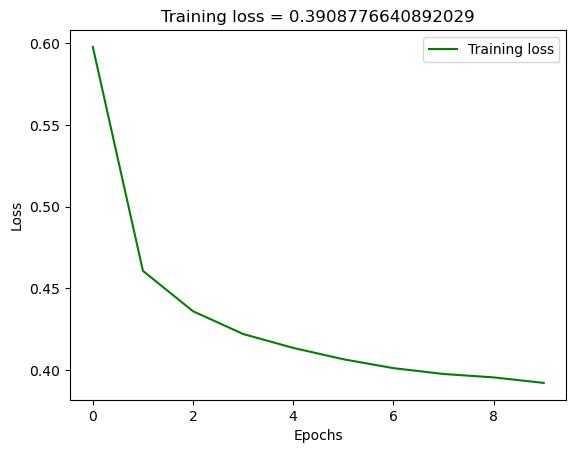

In [23]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title(f'Training loss = {training_loss}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

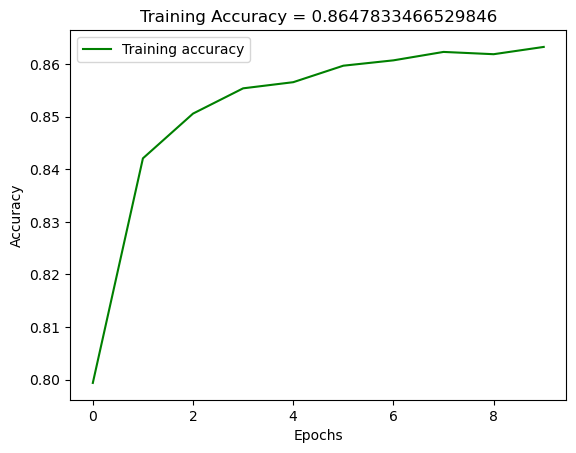

In [24]:
plt.plot(history.epoch, history.history["accuracy"], 'g', label='Training accuracy')
plt.title(f'Training Accuracy = {training_acc}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
loss,accuracy=model.evaluate(X_test,y_test)
print("Loss =",loss)
print("Accuracy =",accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.4561 - accuracy: 0.8423
Loss = 0.4561379849910736
Accuracy = 0.8422999978065491


In [26]:
y_pred=model.predict(X_test)
y_pred

313/313 [==============================] - 0s 1ms/step


array([[2.5660516e-04, 1.1697599e-05, 7.8243427e-03, ..., 9.7919744e-01,
        7.2509938e-01, 9.9780262e-01],
       [4.5769433e-03, 2.5369675e-06, 9.6141022e-01, ..., 2.3483841e-26,
        1.4637239e-04, 5.1296008e-17],
       [7.3476768e-01, 9.9999148e-01, 4.5084730e-01, ..., 1.0623877e-10,
        4.9246736e-03, 1.6189579e-08],
       ...,
       [6.6729754e-01, 7.0876034e-05, 9.3391277e-02, ..., 1.4673852e-04,
        9.1628331e-01, 5.6956071e-07],
       [6.6597372e-02, 9.9998683e-01, 1.4917025e-01, ..., 2.5058159e-07,
        1.9554920e-03, 1.0701448e-03],
       [4.4809356e-03, 1.7842607e-03, 7.6558016e-02, ..., 7.4475247e-01,
        4.8668101e-01, 4.9239162e-02]], dtype=float32)

In [27]:
y_pred[5]

array([8.0233753e-01, 9.9980915e-01, 4.7686020e-01, 1.5016671e-01,
       7.2972500e-01, 2.2503553e-12, 2.4069712e-02, 1.2138454e-13,
       7.8255718e-04, 5.4303646e-09], dtype=float32)

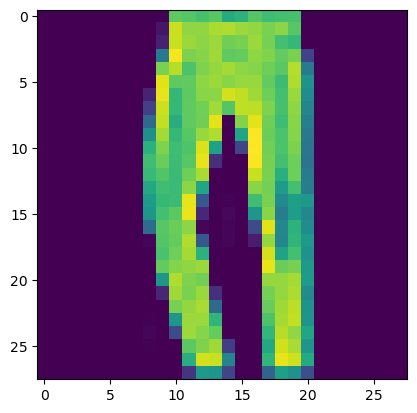

In [28]:
plt.imshow(X_test[5])

In [29]:
np.argmax(y_pred[5])

1

In [30]:
fashion[np.argmax(y_pred[5])]

'Trouser'

In [31]:
y_test[5]

1

In [32]:
fashion[y_test[5]]

'Trouser'

In [33]:
y_pred_label=[np.argmax(val) for val in y_pred]
y_pred_label[:5]

[9, 2, 1, 1, 6]

In [34]:
fash=[fashion[val] for val in y_pred_label[:5]]
fash

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [35]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_label)
print("Recall =",metric.result().numpy())

Recall = 0.9773333


In [36]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred_label)
print("Precision =",m.result().numpy())

Precision = 0.980602


In [37]:
fashion.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

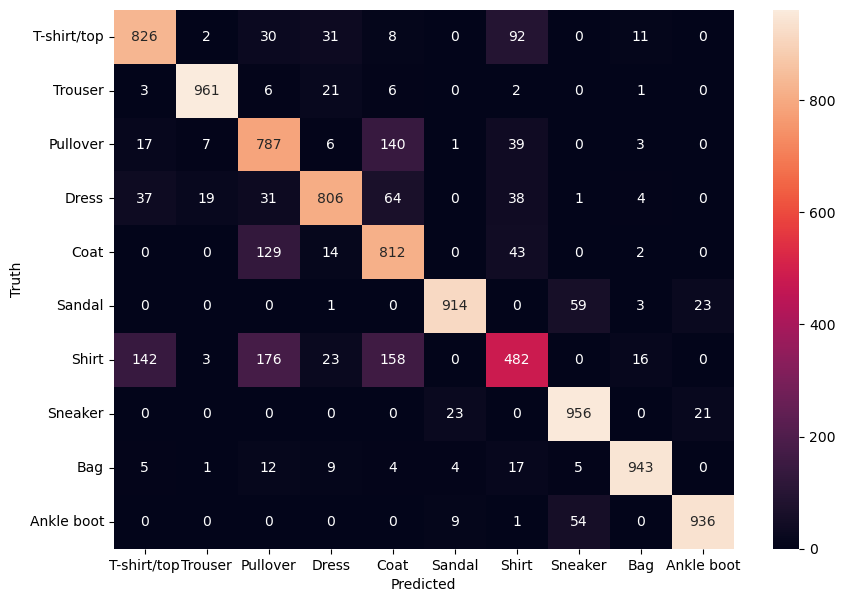

In [38]:
cm = tf.math.confusion_matrix(y_test,y_pred_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',yticklabels=fashion.values(),xticklabels=fashion.values())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

* ### NN with 1 hidden layer

In [39]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(150,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               117750    
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119260 (465.86 KB)
Trainable params: 119260 (465.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5364 - accuracy: 0.8142
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3896 - accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3534 - accuracy: 0.8716
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3293 - accuracy: 0.8799
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3115 - accuracy: 0.8865
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8924
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2813 - accuracy: 0.8973
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2703 - accuracy: 0.9006
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2596 - accuracy: 0.9043
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.250

In [42]:
training_loss,training_acc=model.evaluate(X_train,y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2320 - accuracy: 0.9157


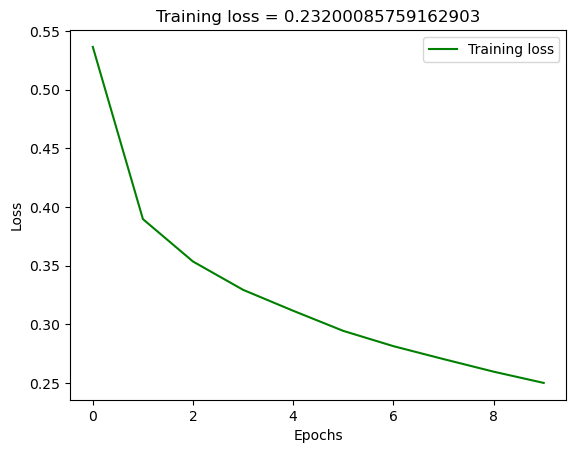

In [43]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title(f'Training loss = {training_loss}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

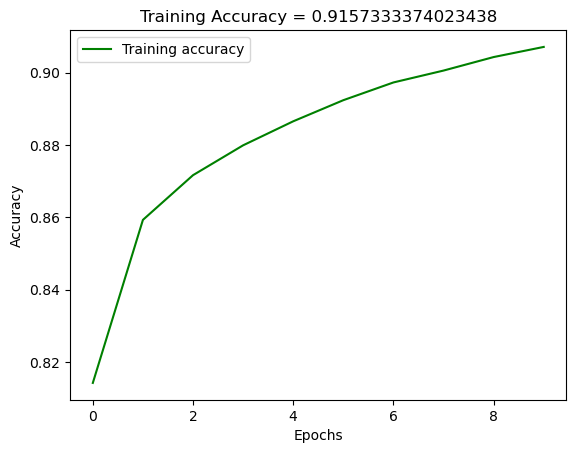

In [44]:
plt.plot(history.epoch, history.history["accuracy"], 'g', label='Training accuracy')
plt.title(f'Training Accuracy = {training_acc}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
loss,accuracy=model.evaluate(X_test,y_test)
print("Loss =",loss)
print("Accuracy =",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8848
Loss = 0.3267538547515869
Accuracy = 0.8848000168800354


In [46]:
y_pred=model.predict(X_test)
y_pred

313/313 [==============================] - 1s 1ms/step


array([[1.4117032e-06, 6.9805111e-07, 1.0780852e-06, ..., 5.0363433e-02,
        7.7042503e-05, 9.3839854e-01],
       [6.4870383e-04, 1.2009093e-07, 9.9281138e-01, ..., 1.1263808e-08,
        7.7882737e-07, 1.1709151e-09],
       [7.9015073e-05, 9.9988687e-01, 2.3782427e-06, ..., 2.5713499e-07,
        5.1807291e-07, 7.0965051e-10],
       ...,
       [4.7739414e-03, 7.0951728e-08, 7.8682037e-04, ..., 3.7036999e-04,
        9.7591269e-01, 1.0829370e-08],
       [3.8766811e-06, 9.9988747e-01, 3.7425573e-07, ..., 3.7141692e-07,
        2.4626542e-07, 5.9443454e-07],
       [1.4289844e-07, 4.1518689e-08, 2.5428928e-06, ..., 6.6616904e-04,
        2.0937892e-05, 9.7667836e-08]], dtype=float32)

In [47]:
y_pred[0]

array([1.4117032e-06, 6.9805111e-07, 1.0780852e-06, 2.3112652e-06,
       2.2281806e-06, 1.1136931e-02, 1.6297048e-05, 5.0363433e-02,
       7.7042503e-05, 9.3839854e-01], dtype=float32)

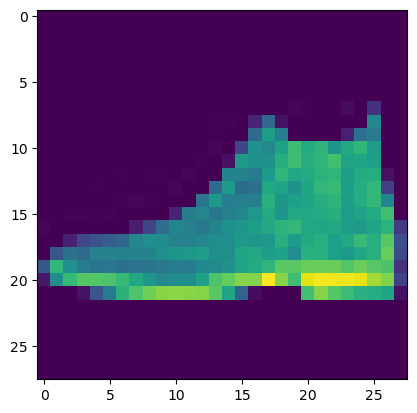

In [48]:
plt.imshow(X_test[0])

In [49]:
np.argmax(y_pred[0])

9

In [50]:
fashion[np.argmax(y_pred[0])]

'Ankle boot'

In [51]:
y_test[0]

9

In [52]:
fashion[y_test[0]]

'Ankle boot'

In [53]:
y_pred_label=[np.argmax(val) for val in y_pred]
y_pred_label[:8]

[9, 2, 1, 1, 6, 1, 4, 6]

In [54]:
fash=[fashion[val] for val in y_pred_label[:8]]
fash

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt']

In [55]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_label)
print("Recall =",metric.result().numpy())

Recall = 0.983


In [56]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred_label)
print("Precision =",m.result().numpy())

Precision = 0.98038566


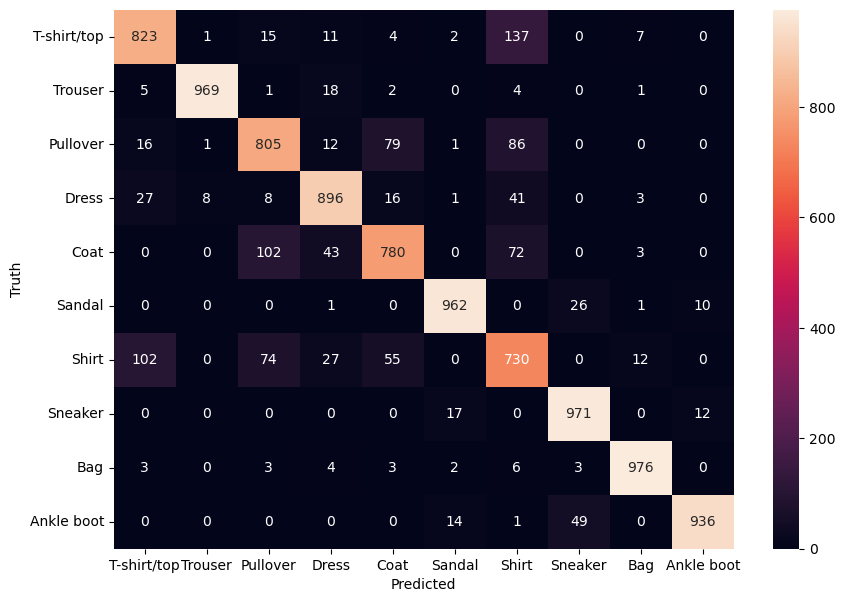

In [57]:
cm = tf.math.confusion_matrix(y_test,y_pred_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',yticklabels=fashion.values(),xticklabels=fashion.values())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

* ### NN with 2 hidden layer

In [58]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(80,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dense_4 (Dense)             (None, 80)                16080     
                                                                 
 dense_5 (Dense)             (None, 10)                810       
                                                                 
Total params: 173890 (679.26 KB)
Trainable params: 173890 (679.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
history=model.fit(X_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 13s 5ms/step - loss: 0.5034 - accuracy: 0.8249
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3565 - accuracy: 0.8696
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3183 - accuracy: 0.8826
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2944 - accuracy: 0.8915
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2775 - accuracy: 0.8969
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2630 - accuracy: 0.9019
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2505 - accuracy: 0.9064
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2384 - accuracy: 0.9102
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2289 - accuracy: 0.9150
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.21

In [61]:
training_loss,training_acc=model.evaluate(X_train,y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1891 - accuracy: 0.9293


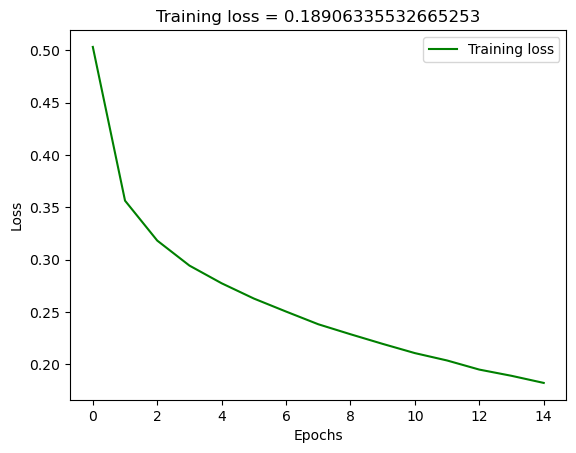

In [62]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title(f'Training loss = {training_loss}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

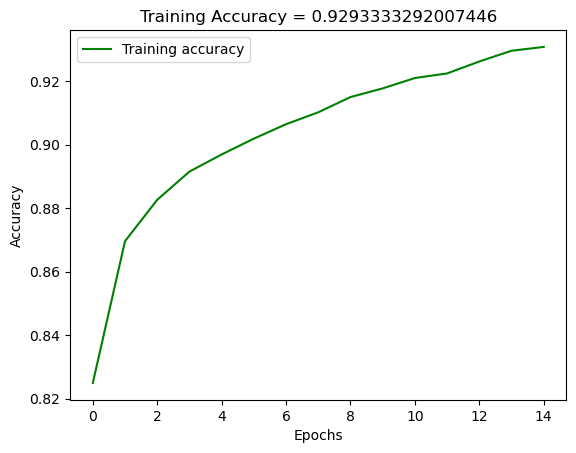

In [63]:
plt.plot(history.epoch, history.history["accuracy"], 'g', label='Training accuracy')
plt.title(f'Training Accuracy = {training_acc}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [64]:
loss,acc=model.evaluate(X_test,y_test)
print("Loss =",loss)
print("Accuracy =",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8809
Loss = 0.3377525508403778
Accuracy = 0.8848000168800354


In [65]:
y_pred=model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[9.7325379e-03, 7.7211022e-05, 6.7282905e-04, ..., 8.2418942e-01,
        1.5936411e-04, 9.9967474e-01],
       [3.7599882e-01, 1.0637579e-05, 9.9843705e-01, ..., 1.8206897e-06,
        2.3979930e-05, 6.0884537e-05],
       [2.0028779e-01, 9.9998903e-01, 6.8910862e-03, ..., 4.2197880e-04,
        1.2700550e-03, 2.5788688e-05],
       ...,
       [7.4568354e-02, 4.3313677e-04, 3.0406008e-02, ..., 5.1059440e-04,
        9.9967158e-01, 2.7521304e-05],
       [8.3076380e-02, 9.9993771e-01, 7.7500273e-03, ..., 4.2452947e-03,
        1.5692944e-02, 2.0423156e-04],
       [3.1804617e-03, 1.2293374e-04, 4.0162291e-04, ..., 2.0899400e-01,
        1.0495017e-02, 2.3313063e-05]], dtype=float32)

In [66]:
y_pred[9]

array([1.3531632e-03, 1.3469151e-04, 6.0835708e-04, 1.4230235e-04,
       1.1524901e-04, 3.3011612e-01, 4.7975546e-03, 9.9981123e-01,
       1.0180844e-03, 4.0172800e-01], dtype=float32)

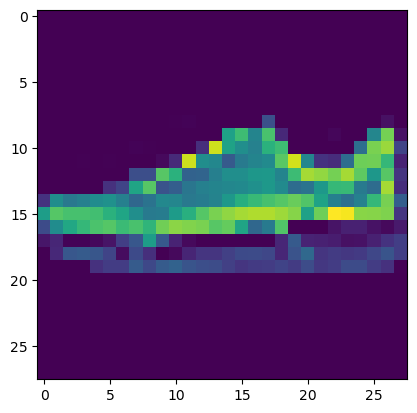

In [67]:
plt.imshow(X_test[9])

In [68]:
np.argmax(y_pred[9])

7

In [69]:
fashion[np.argmax(y_pred[9])]

'Sneaker'

In [70]:
y_test[9]

7

In [71]:
fashion[y_test[9]]

'Sneaker'

In [72]:
y_pred_label=[np.argmax(val) for val in y_pred]
y_pred_label[:8]

[9, 2, 1, 1, 0, 1, 4, 6]

In [73]:
fash=[fashion[val] for val in y_pred_label[:8]]
fash

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'T-shirt/top',
 'Trouser',
 'Coat',
 'Shirt']

In [74]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_label)
print("Recall =",metric.result().numpy())

Recall = 0.9727778


In [75]:
metric = tf.keras.metrics.Precision()
metric.update_state(y_test, y_pred_label)
print("Precision =",metric.result().numpy())

Precision = 0.9868125


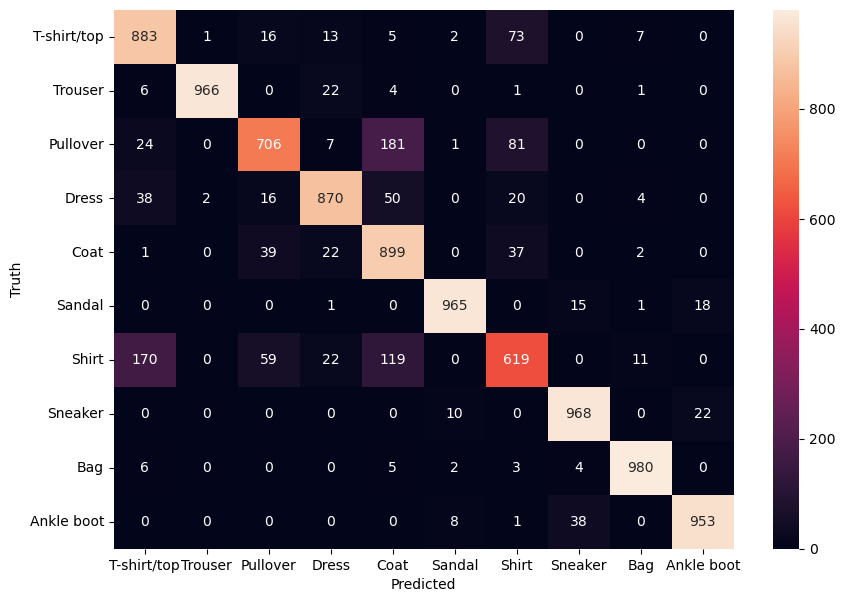

In [76]:
cm = tf.math.confusion_matrix(y_test,y_pred_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',yticklabels=fashion.values(),xticklabels=fashion.values())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()